<a href="https://colab.research.google.com/github/talha469/Cassava-Leaf-Disease-Classification/blob/main/Cassava_Leaf_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle competitions download --force cassava-leaf-disease-classification
!unzip \*.zip  && rm *.zip

!pip install efficientnet
import efficientnet.keras as efn

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


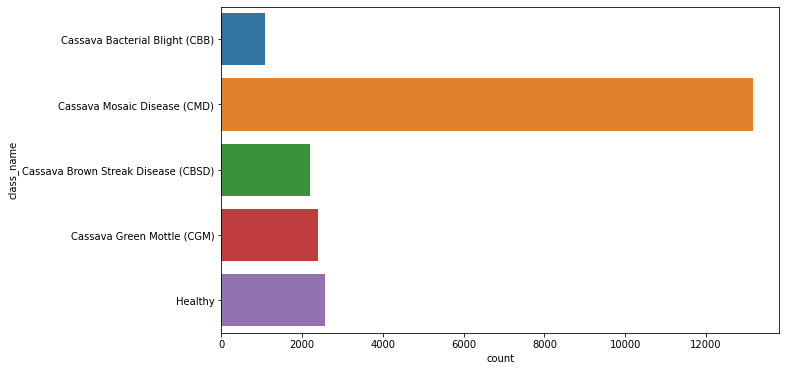

In [ ]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sn
base_dir="/content/"
#reading json file data for exploratory data analysis
{'class1':[0,2,2,3,] }
with open(os.path.join(base_dir, "label_num_to_disease_map.json")) as file:
    map_classes = json.loads(file.read())
    map_classes = {int(k) : v for k, v in map_classes.items()}   
print(json.dumps(map_classes, indent=4))
df_train = pd.read_csv(os.path.join(base_dir, "train.csv"))

df_train["class_name"] = df_train["label"].map(map_classes)

plt.figure(figsize=(10, 6))
sn.countplot(y="class_name", data=df_train);

             image_id  label                           class_name
7239   2292375600.jpg      3         Cassava Mosaic Disease (CMD)
807    1137739472.jpg      2           Cassava Green Mottle (CGM)
6540   2173674867.jpg      2           Cassava Green Mottle (CGM)
20429   811026048.jpg      1  Cassava Brown Streak Disease (CBSD)
16783  4019067935.jpg      3         Cassava Mosaic Disease (CMD)
20096    74571802.jpg      4                              Healthy
4355   1777490062.jpg      3         Cassava Mosaic Disease (CMD)
20475   817893600.jpg      3         Cassava Mosaic Disease (CMD)
12311  3205585005.jpg      0       Cassava Bacterial Blight (CBB)
17797  4205935925.jpg      3         Cassava Mosaic Disease (CMD)
3090   1535644192.jpg      3         Cassava Mosaic Disease (CMD)
9493   2681268297.jpg      3         Cassava Mosaic Disease (CMD)


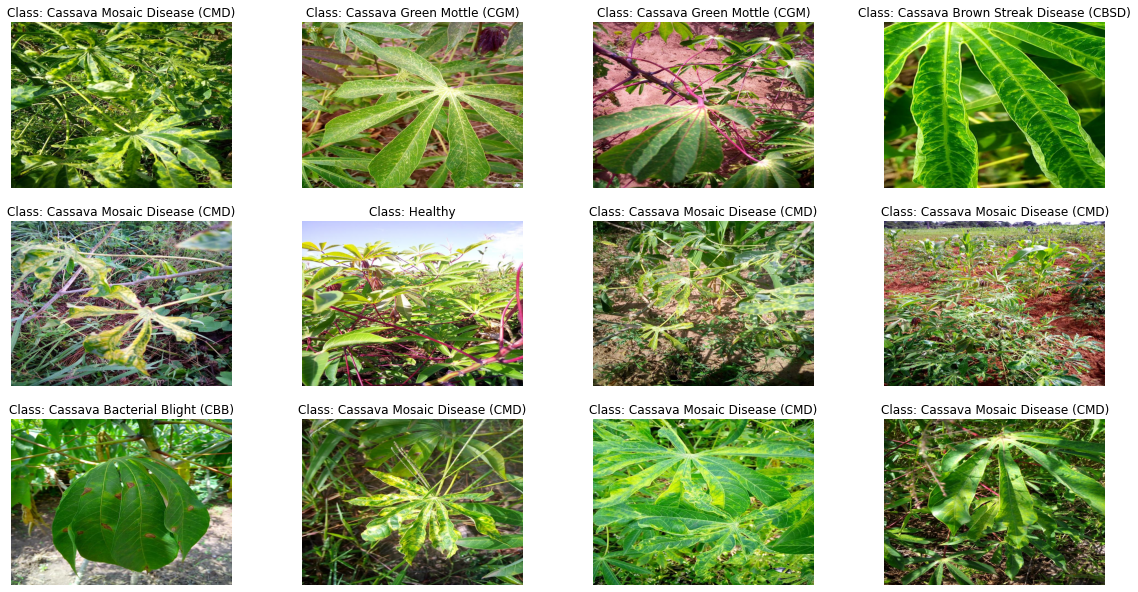

In [ ]:
import cv2 as cv
def visualize_batch(image_ids, labels):
    plt.figure(figsize=(20,14))
    for ind, (image_id, label) in enumerate(zip(image_ids, labels)):
        plt.subplot(4, 4, ind + 1)
        image = cv.imread(os.path.join(base_dir, "train_images", image_id))
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(f"Class: {label}", fontsize=12)
        plt.axis("off")
    plt.show()

tmp_df = df_train.sample(12)
print(tmp_df)
image_ids = tmp_df["image_id"].values
labels = tmp_df["class_name"].values

visualize_batch(image_ids, labels)

In [ ]:
import efficientnet.keras as efn
# Bi Tempered Logistic Loss
#from tf_bi_tempered_loss import BiTemperedLogisticLoss

In [ ]:
 
import efficientnet.keras as efn 
import tensorflow as tf
from keras.engine.saving import save_model
from keras.optimizers import Adam
from tensorflow.keras.applications import resnet
from keras.preprocessing.image import ImageDataGenerator    #image data generator will generate multiple copies of the same image by rotating, zooming etc
from keras.applications import MobileNetV2
from keras.callbacks import Callback, ModelCheckpoint
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D               #dealing data in 2d format
from keras.layers import Activation,Dropout,Flatten,Dense   #Activation tells when to 1 -1 Zero, Dropout will be used to add some noise so model can not learn exactly  , Flatten will be used to convert 2D to 1D and dense is actually a layer
from keras import backend as K                               #help to understand channel
from keras.preprocessing import image                       #importing image from direcory
import numpy as np
import pandas as pd                                       #for dealing with files,directoires
import csv
from csv import reader
from tensorflow.keras.applications import EfficientNetB7
from matplotlib import pyplot as plt
#for reading file,csv
from csv import writer                                   #for writing the file,csv
import os
import json
import keras
from keras import layers
from tensorflow.keras import layers,regularizers,Sequential,backend,callbacks,optimizers,metrics,losses
 
 
traindf=pd.read_csv('/content/train.csv',dtype=str)
train_data_directory =('/content/train_images')
traindf['label']=traindf['label'].astype(str)
 
 

train_labels = traindf
BATCH_SIZE = 32  
STEPS_PER_EPOCH = len(train_labels)*0.8 / BATCH_SIZE
VALIDATION_STEPS = len(train_labels)*0.2 / BATCH_SIZE
EPOCHS = 25
TARGET_SIZE = 512  #image input size
 
 
train_generator = ImageDataGenerator(
                                     validation_split = 0.2,
                                     //
                                     rotation_range = 20,
                                     zoom_range = 0.3,
                                     cval = 0.2,
                                     brightness_range=[0.2,0.7],
                                     fill_mode = 'wrap',
                                     shear_range = 0.3,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     height_shift_range = 0.4,
                                     width_shift_range = 0.4,
                                     )
 
trained_data=train_generator.flow_from_dataframe(train_labels,
                         directory = train_data_directory,
                         subset = "training",
                         x_col = "image_id",
                         y_col = "label",
                         target_size = (TARGET_SIZE, TARGET_SIZE),
                         batch_size = BATCH_SIZE,
                         class_mode = "categorical")
 
validation_generator = ImageDataGenerator(validation_split = 0.2) 
 
validation=validation_generator.flow_from_dataframe(train_labels,
                         directory = train_data_directory,
                         subset = "validation",
                         x_col = "image_id",
                         y_col = "label",
                         target_size = (TARGET_SIZE, TARGET_SIZE),
                         batch_size = BATCH_SIZE,
                         class_mode = "categorical")
 
def create_model():
    model = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomCrop(height=TARGET_SIZE, width=TARGET_SIZE),
        layers.experimental.preprocessing.RandomContrast((0.3,0.3))
    ]
)
 
    model.add(efn.EfficientNetB4(include_top = False, weights = 'noisy-student',
                             input_shape = (TARGET_SIZE, TARGET_SIZE, 3)))
    model.add(layers.GlobalAveragePooling2D())
    
    model.add(layers.Dense(5, activation = "softmax")) #more than 2 classes
    return model
 
model = create_model()
 
 
 
 
 
 
 
 
filepath=("/content/gdrive/MyDrive/CNN/B4_label/epochs:{epoch:03d}-val_loss:{val_loss:.3f}.h5")
 
#model=tf.keras.models.load_model('/content/gdrive/MyDrive/CNN/B3_randomzoom/epochs:011-val_loss:0.364.h5') 
model.compile(optimizer = Adam(lr =0.001),
                  loss =tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.3),
                  metrics = ["acc"])
 
checkpoint=tf.keras.callbacks.ModelCheckpoint(
    filepath, save_best_only = True, 
                             save_weights_only = False,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
early_stop =tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                           patience = 5, mode = 'min', verbose = 1,
                           restore_best_weights = True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'min', verbose = 1)
 
history=model.fit_generator(
    trained_data,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=validation,
    validation_steps=VALIDATION_STEPS,
    callbacks = [checkpoint, early_stop, reduce_lr]
    )


Found 17118 validated image filenames belonging to 5 classes.
Found 4279 validated image filenames belonging to 5 classes.
Epoch 1/10
534/534 [==============================] - 621s 1s/step - loss: 1.2756 - acc: 0.6837 - val_loss: 1.2630 - val_acc: 0.7006

Epoch 00001: val_loss improved from inf to 1.26302, saving model to /content/gdrive/MyDrive/CNN/B4_label/epochs:001-val_loss:1.263.h5
Epoch 2/10
534/534 [==============================] - 578s 1s/step - loss: 1.1353 - acc: 0.7957 - val_loss: 1.2067 - val_acc: 0.7214

Epoch 00002: val_loss improved from 1.26302 to 1.20665, saving model to /content/gdrive/MyDrive/CNN/B4_label/epochs:002-val_loss:1.207.h5
Epoch 3/10
534/534 [==============================] - 575s 1s/step - loss: 1.1054 - acc: 0.8191 - val_loss: 1.1809 - val_acc: 0.7429

Epoch 00003: val_loss improved from 1.20665 to 1.18085, saving model to /content/gdrive/MyDrive/CNN/B4_label/epochs:003-val_loss:1.181.h5
Epoch 4/10
534/534 [==============================] - 578s 1s/ste

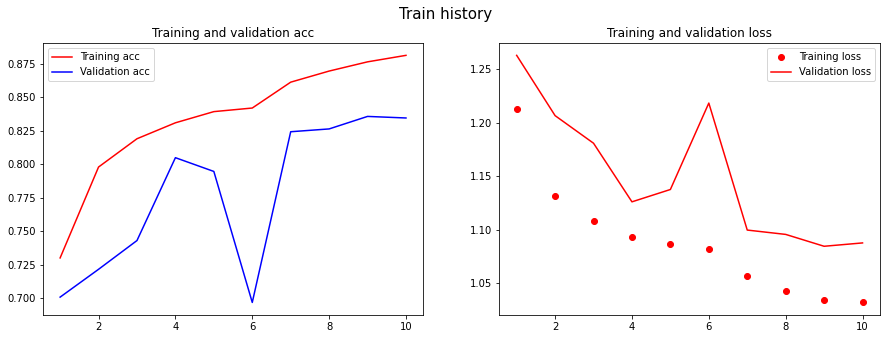

In [ ]:
import matplotlib.pyplot as plt 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
 
plt.suptitle('Train history ', size = 15)
 
ax1.plot(epochs, acc, "red", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()
 
ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()
 
plt.show()

### Converting to TF-Lite

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

My_TFlite_Model = tf.keras.models.load_model('My_saved_Model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(minor_model)
tflite_model = converter.convert()
open("My_TFlite_Model.tflite", "wb").write(tflite_model)


In [ ]:
import tensorflow as tf
import numpy as np

import pandas as pd
from tensorflow.keras.applications import EfficientNetB4
from keras.engine.saving import save_model
from keras.applications import inception_resnet_v2
from keras.optimizers import Adam
from tensorflow.keras.applications import densenet
from keras.preprocessing.image import \
    ImageDataGenerator  # image data generator will generate multiple copies of the same image by rotating, zooming etc
from keras.applications import DenseNet169
from keras.callbacks import Callback, ModelCheckpoint
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D  # dealing data in 2d format
from keras.layers import Activation, Dropout, Flatten, \
    Dense  # Activation tells when to 1 -1 Zero, Dropout will be used to add some noise so model can not learn exactly  , Flatten will be used to convert 2D to 1D and dense is actually a layer
from keras import backend as K  # help to understand cahannel
from keras.preprocessing import image
import os
class FixedDropout(tf.keras.layers.Dropout): 
    def _get_noise_shape(self, inputs): 
        if self.noise_shape is None:
            return self.noise_shape 
        symbolic_shape = K.shape(inputs) 
        noise_shape = [symbolic_shape[axis] 
        if shape is None else shape
        for axis, shape in enumerate(self.noise_shape)] 
        return tuple(noise_shape)
dependencies = { 'FixedDropout':FixedDropout }
model1 = tf.keras.models.load_model('/content/drive/MyDrive/CNN/epochs-004-val_loss-0.353.h5' ,custom_objects =dependencies)
#model2 = tf.keras.models.load_model('../input/b3-512-try-dtype32/epochs-006-val_accuracy-0.806.h5' ,custom_objects =dependencies)
#model = tf.keras.models.load_model('../input/b4-512-0349-nolabel/epochs_002-val_loss_0.349.h5' , compile=False)
import matplotlib.pyplot as plt
import glob
import cv2 as cv
path="/content/drive/MyDrive/CNN/local_test" 
array=[]
true_array=[]
resultpred=[]
for filename in os.listdir(path+'/'):
    img=(path+'/'+filename)
    img_predicitions = image.load_img(img, target_size=(512,512, 3))
    img_predicition = image.img_to_array(img_predicitions)
    img_predicition = np.expand_dims(img_predicition, axis=0)
    
    result1 = model1.predict_generator(img_predicition)
    #result2 = model2.predict_generator(img_predicition)
    resultfirst = np.average(result1, axis=0)
    #print(filename,resultfirst)
    #resultsecond = np.average(result2, axis=0)
    #print(filename,resultsecond)
    #result = [a + b for a, b in zip(resultfirst,resultsecond)]
    #print('summed',result)
    result = np.argmax(resultfirst)
    #print(filename,result)
    array.append([filename[1],int(result)])
    resultpred.append(int(result))
    true_array.append(int(filename[1]))
df = pd.DataFrame(array, columns =['image_id', 'label'])
print(df)
df.to_csv("submission.csv", sep=',', index=False)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


   image_id  label
0         4      4
1         4      4
2         4      4
3         4      2
4         3      3
5         3      3
6         3      3
7         3      3
8         2      2
9         2      3
10        2      3
11        2      2
12        1      1
13        1      3
14        1      1
15        1      1
16        0      0
17        0      4
18        0      0
19        0      4


In [ ]:
print(true_array)
print(resultpred)

[4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0]
[4, 4, 4, 2, 3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 0, 4, 0, 4]


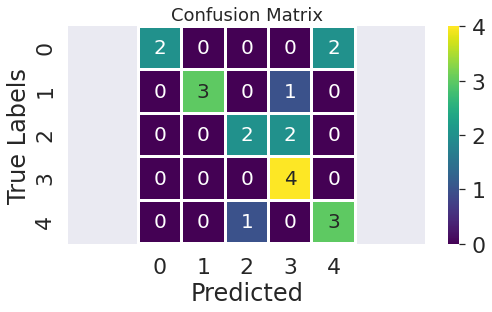

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sn
ConfusionMatrixSklearn = confusion_matrix(true_array,resultpred)
with plt.style.context('seaborn'): 
    plt.figure(figsize=(8, 4))
    sn.set(font_scale=2)
    sn.heatmap(ConfusionMatrixSklearn, annot=True, square=True, annot_kws={"size":20},linewidth=2, cmap='viridis')
    plt.xlabel('Predicted'); plt.ylabel('True Labels')
    plt.axis('equal'); plt.title('Confusion Matrix',fontsize=18)
    plt.show()